# Dataset Description

For this programming material, we are going to use 
[gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq). Originally, this dataset is hosted at [synapse](https://www.synapse.org/) but for this programming material, we are going to extract dataset from [UCI](https://archive.ics.uci.edu/). The dataset contains gene expression of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and 
PRAD. 

**Source:** Samuele Fiorini, samuele.fiorini@dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

**Number of attributes:** 20531

**Number of instances:** 801

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv("CANCER_RNA_SEQ/data.csv", index_col = 0)
labels = pd.read_csv("CANCER_RNA_SEQ/labels.csv", index_col = 0)

In [8]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

# HyperParameters
## 1. Number of Cluster (K)
### Elbow Method
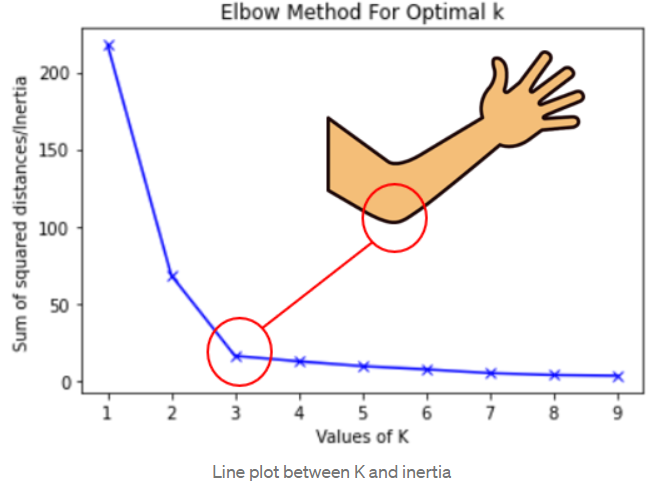

In [12]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X)

    scores.append(model.inertia_)
    del model

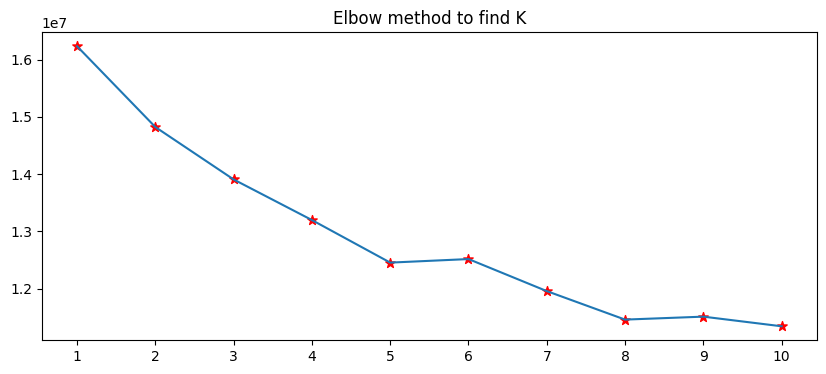

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(range(1,11), scores)
plt.scatter(range(1,11), scores, s= 50, marker = "*", c = "red")

plt.xticks(range(1,11))
plt.title("Elbow method to find K")
plt.show()

## 2. Centroid Initialization

### A . Random/ Frogy Initialization

Forgy initialization is the simplest method of cluster centroid initialization. In Forgy initialization, we pick the random _K_ points from the available data points and assign them as a cluster centroids.

### B. _K_-Means++

The _K_-Means++ is the popular centroid initialization method. This algorithm carefully selects the initial centroids for _K_-Means clustering. It follows a simple probability-based approach where the first centroid is selected at random and after that, the squared distance is calculated for all the data points with that centroid. For the next centroid, a data point that has the largest distance has the highest probability of being selected. This selection is decided based on a weighted probability score which we will also see in the code snippet below. The selection is continued until we have _K_ centroids, and then _K_-Means clustering is done using these centroids.


**Algorithm KMeans++**

1. Initialize _K_ and pick first initial centroid at random from the dataset.
2. Calculate distance from the first centroid to all data points.
3. Pick next centroid which is farthest from the first centroid using some weighted probability score.
4. Repeat 2-3 until _K_ clusters reached.

<div align="center">
    <figure>
<p>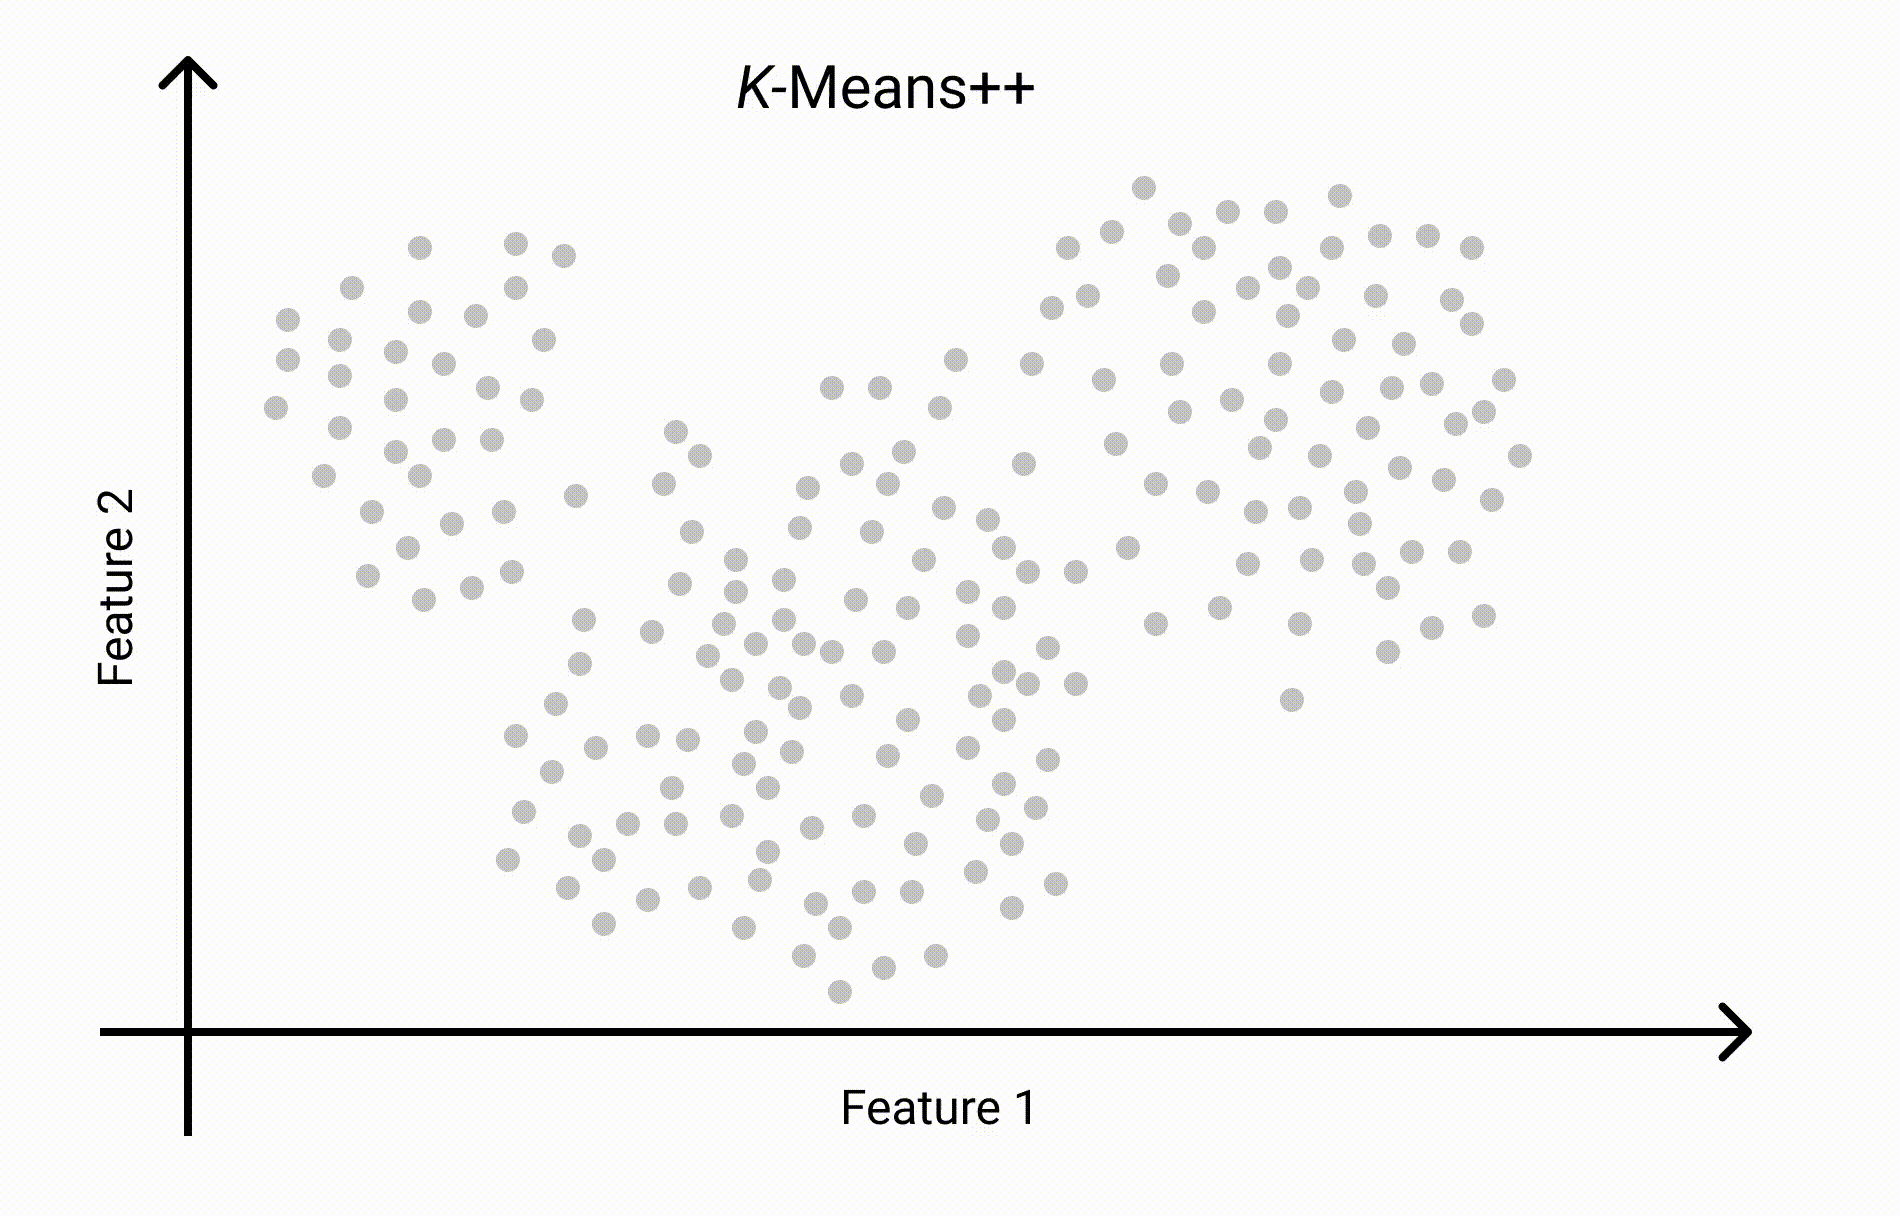</p>
     <figcaption>Figure 4: K-Means++ initialization</figcaption>
    </figure>
</div>

In [30]:
## Kmeans Model

In [32]:
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=999)
kmeans_model.fit(X)

KMeans(n_clusters=5, random_state=999)

In [33]:
kmeans_model.inertia_

12197294.201629212

In [36]:
y_pred = kmeans_model.labels_

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(X,y_pred)

np.float64(0.13507290311138614)